# Phát hiện gian lận thẻ tín dụng

Thư viện

In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from keras.models import Sequential
from keras.layers import Dense,Input
from keras.metrics import AUC
from keras.losses import BinaryCrossentropy


# Xử lý outliner
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

# I. Data

## 1. Data Collecting

In [2]:
data_path = './data/train-dataset.csv'
data = pd.read_csv(data_path)

In [3]:
sub_path = './data/test-dataset.csv'
data_submission = pd.read_csv(sub_path)

## 2. Data understanding

Chiều dài dữ liệu

In [4]:
len(data)

199364

Hiện thị dữ liệu

In [5]:
data.tail()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199359,199359,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98,0
199360,199360,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23,0
199361,199361,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94,0
199362,199362,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00,0
199363,199363,76381.0,1.233174,-0.784851,0.386784,-0.698559,-1.034018,-0.637028,-0.502369,-0.188057,...,0.027634,-0.234522,-0.059544,-0.109073,0.290326,-0.393074,0.001217,0.038588,113.00,0


Hiển thị tóm tắt về dữ liệu

In [6]:
data.describe()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,...,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000
mean,99681.500000,94748.021453,-0.001491,-0.002331,0.002040,-0.001072,0.000499,-0.001898,0.002623,-0.001166,...,-0.000309,-0.001793,-0.000179,-0.000634,-0.000958,0.000671,-0.000575,-0.000022,88.799754,0.001786
std,57551.573871,47474.287612,1.960957,1.667882,1.514420,1.416783,1.393311,1.337511,1.248391,1.188393,...,0.731509,0.725378,0.633316,0.605789,0.522343,0.482478,0.406323,0.329310,258.426885,0.042220
min,0.000000,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,49840.750000,54176.000000,-0.920935,-0.599013,-0.885992,-0.849764,-0.689221,-0.768043,-0.551137,-0.207810,...,-0.228998,-0.543142,-0.161315,-0.354771,-0.317579,-0.326848,-0.071015,-0.053090,5.607500,0.000000
50%,99681.500000,84604.500000,0.013616,0.066441,0.182979,-0.021602,-0.056453,-0.274239,0.042759,0.022222,...,-0.029860,0.005059,-0.010632,0.040783,0.014793,-0.050547,0.001238,0.011385,22.000000,0.000000
75%,149522.250000,139255.250000,1.314703,0.803312,1.028217,0.741059,0.609969,0.394597,0.570624,0.326793,...,0.186112,0.526039,0.147780,0.439039,0.350492,0.242133,0.091392,0.078537,77.372500,0.000000
max,199363.000000,172792.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Xem phân phối của từng cột

<AxesSubplot:>

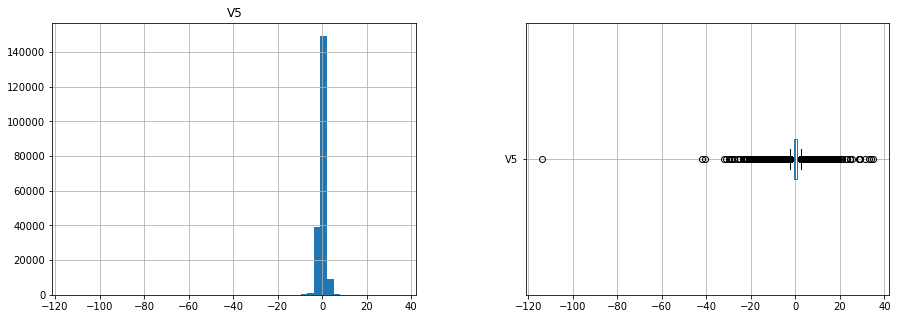

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data[["V5"]].hist(bins=50, ax=axes[0])
data[["V5"]].boxplot(ax=axes[1], vert=False)

Kiểm tra dữ liệu null

In [8]:
col_null = pd.isnull(data).any(axis=1)
data[col_null]

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


Kiểm tra sự tương quan của từng cột

In [9]:
data.corr()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
ID,1.000000,-0.003158,-0.004328,-0.003543,0.000194,0.000776,8.243381e-04,0.002624,-0.002258,0.002575,...,-0.000557,0.002747,-0.000327,0.003484,-0.003406,-0.002261,-0.001694,-0.001597,0.002183,0.000140
Time,-0.003158,1.000000,0.116815,-0.010624,-0.420685,-0.103994,1.701811e-01,-0.062820,0.081971,-0.038908,...,0.044472,0.146647,0.050014,-0.015530,-0.231385,-0.042524,-0.007401,-0.010869,-0.009885,-0.013910
V1,-0.004328,0.116815,1.000000,0.017747,-0.001115,-0.001786,-4.058961e-03,-0.000950,-0.013030,0.001191,...,0.001283,0.003455,0.009165,-0.001687,0.003159,-0.001494,-0.001690,-0.000226,-0.235517,-0.093115
V2,-0.003543,-0.010624,0.017747,1.000000,0.011171,-0.007648,5.405066e-03,-0.000770,-0.003275,0.001559,...,0.001179,0.004738,0.008968,-0.001869,0.003129,0.000053,-0.007049,-0.003347,-0.534306,0.085920
V3,0.000194,-0.420685,-0.001115,0.011171,1.000000,-0.003485,3.465664e-03,-0.005683,-0.017712,0.003360,...,0.000686,0.001065,0.007911,0.000598,0.000614,-0.001211,-0.003072,0.007200,-0.220770,-0.186946
V4,0.000776,-0.103994,-0.001786,-0.007648,-0.003485,1.000000,-6.807957e-04,0.003023,0.005469,0.000869,...,0.000264,0.000787,-0.004854,-0.000733,-0.001424,0.001669,0.004668,0.002935,0.105724,0.135672
V5,0.000824,0.170181,-0.004059,0.005405,0.003466,-0.000681,1.000000e+00,-0.017349,-0.032267,0.005755,...,0.002419,-0.000991,0.005906,-0.001456,0.003871,0.000274,-0.010310,0.016152,-0.398444,-0.085749
V6,0.002624,-0.062820,-0.000950,-0.000770,-0.005683,0.003023,-1.734882e-02,1.000000,0.018089,-0.003159,...,-0.004006,0.002360,-0.003613,-0.001079,-0.000570,-0.000542,0.004815,-0.010702,0.226594,-0.045829
V7,-0.002258,0.081971,-0.013030,-0.003275,-0.017712,0.005469,-3.226654e-02,0.018089,1.000000,-0.008724,...,-0.002709,-0.001756,-0.001386,0.001211,-0.000879,0.000178,0.013897,-0.016055,0.416707,-0.175477
V8,0.002575,-0.038908,0.001191,0.001559,0.003360,0.000869,5.755427e-03,-0.003159,-0.008724,1.000000,...,0.007102,-0.000464,0.005816,0.000227,-0.001585,-0.002143,-0.003816,0.002565,-0.107922,0.028849


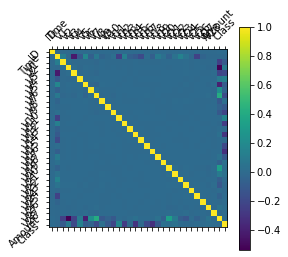

In [10]:
plt.matshow(data.corr())
continuous_feature = data.describe().columns
plt.xticks(range(len(continuous_feature)), continuous_feature, rotation = 45)
plt.yticks(range(len(continuous_feature)), continuous_feature, rotation = 45)
plt.colorbar()
plt.show()

## 3. Data preparation

### Clean

Thuộc tính thừa

In [11]:
def drop_feature(data_frame):
    data_frame = data_frame.drop(['ID'], axis = 1)
    return data_frame

In [12]:
data = drop_feature(data)

In [13]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2105.0,-2.289565,-0.480260,0.818685,-1.706423,0.822102,-1.660326,0.944047,-0.541765,1.323156,...,-0.210837,0.914737,0.867888,0.422969,0.310584,-0.781488,0.392241,-0.147757,1.00,0
1,153702.0,-0.313717,-4.064342,-3.398445,0.704011,0.101662,1.529848,1.551670,-0.036774,0.015829,...,0.853186,-0.091941,-0.936215,-0.833081,-0.498728,0.651183,-0.290331,0.110360,1194.28,0
2,97283.0,-1.809763,-0.567439,2.265186,-0.960318,-1.212537,1.516493,-1.417176,0.903421,1.961027,...,-0.509915,-0.424978,-0.268621,0.010121,0.466862,0.835540,-0.062385,0.088079,75.00,0
3,68628.0,1.192319,0.178575,0.141491,0.459628,-0.049959,-0.112122,-0.163883,0.155740,-0.067566,...,-0.240464,-0.739862,0.116799,-0.373837,0.125470,0.130126,-0.016956,0.011937,1.98,0
4,11951.0,-0.963451,0.700311,1.097333,-1.547626,0.669966,0.513533,0.333683,0.270900,1.381880,...,-0.279519,-0.470181,-0.124037,-1.388839,-0.237453,0.785347,0.349708,0.216207,37.31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199359,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98,0
199360,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23,0
199361,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94,0
199362,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00,0


Xử lý outliner
Làm theo hướng dẫn tại https://machinelearningcoban.com/tabml_book/ch_data_processing/process_outliers.html

In [14]:
def find_boxplot_boundaries(
        col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [15]:
col_outliner = data.columns.values.tolist()
def pre_outlier(data_frame):
    for col in col_outliner[:30]:
        clipped_total_rooms = BoxplotOutlierClipper().fit_transform(data_frame[col])
        data_frame[col] = clipped_total_rooms
    return data_frame

In [16]:
data = pre_outlier(data)

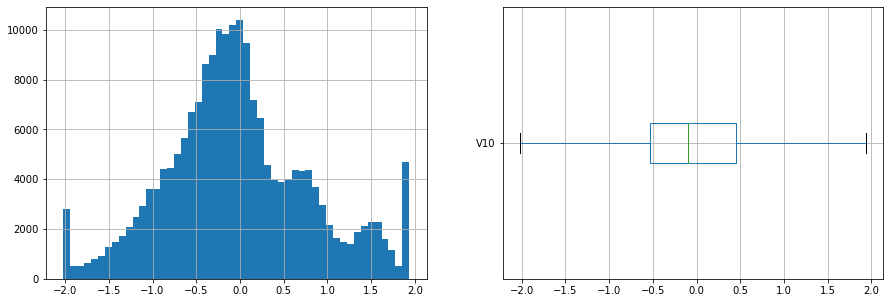

In [17]:
view = data['V10']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
view.hist(bins=50, ax=axes[0])
view.to_frame().boxplot(ax=axes[1], vert=False);

### Normalization

Min-max scaler

In [18]:
min_max_scaler = MinMaxScaler()
col_mm = ['Time','Amount']

Trên tập train

In [19]:
min_max_scaler.fit(data[col_mm])
x_scaled = min_max_scaler.transform(data[col_mm])
normalized_features = pd.DataFrame(x_scaled, columns=col_mm, index = data.index)
data[col_mm] = normalized_features

Trên các tập còn lại

In [20]:
def minmax(df_tmp):
    x_scaled = min_max_scaler.transform(df_tmp[col_mm])
    normalized_features = pd.DataFrame(x_scaled, columns=col_mm, index = df_tmp.index)
    return normalized_features

### Standlization

In [21]:
standard_scaler = StandardScaler()
normalized_ss = ['V2','V3','V4','V5','V6','V7','V8','V9','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V27','V1','V10','V26','V28']

In [22]:
standard_scaler.fit(data[normalized_ss])
x_scaled = standard_scaler.transform(data[normalized_ss])
normalized_features = pd.DataFrame(x_scaled, columns=normalized_ss, index=data.index)
data[normalized_ss] = normalized_features

In [23]:
def standard(df_tmp):
    x_scaled = standard_scaler.transform(df_tmp[normalized_ss])
    normalized_features = pd.DataFrame(x_scaled, columns=normalized_ss, index=df_tmp.index)
    return normalized_features

In [24]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.012182,-1.483668,-0.472418,0.576440,-1.280121,0.767097,-1.567969,1.081406,-1.259200,1.315021,...,-0.601974,1.293137,2.307521,0.709203,0.624006,-1.662941,1.948869,-1.276363,0.005405,0
1,0.889520,-0.243486,-2.452738,-2.502076,0.559670,0.097074,1.623571,1.785084,-0.216544,0.030686,...,2.543073,-0.130175,-2.326602,-1.404264,-1.017248,1.398853,-1.829731,0.796518,1.000000,0
2,0.563006,-1.182510,-0.550107,1.632390,-0.710648,-1.125155,1.610210,-1.653086,1.724683,1.941674,...,-1.524495,-0.601047,-0.991005,0.014532,0.940931,1.792847,-0.452359,0.617581,0.405362,0
3,0.397171,0.701808,0.114694,0.082087,0.373142,-0.043935,-0.019102,-0.201668,0.180943,-0.051242,...,-0.693360,-1.046252,0.453604,-0.631527,0.248602,0.285290,-0.177852,0.006105,0.010702,0
4,0.069164,-0.651305,0.579632,0.779854,-1.158918,0.625608,0.606821,0.374555,0.418713,1.372712,...,-0.813827,-0.664958,-0.449084,-2.339401,-0.487393,1.685579,1.948869,1.646550,0.201654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199359,0.437624,0.689988,0.045379,0.336873,0.374644,-0.273109,-0.120189,-0.203257,0.105542,-0.097055,...,-0.525446,-0.812144,0.620794,-0.012829,0.179599,0.240643,-0.201819,-0.057898,0.010702,0
199360,0.920181,-0.533636,0.083904,-0.855156,-0.924968,1.807096,2.232541,-0.551669,2.189814,0.408785,...,0.162731,-0.027859,0.922239,1.146436,-2.682117,-1.640401,0.323450,1.010905,0.482272,0
199361,0.461798,-0.138598,0.840410,1.091754,0.393098,0.327390,-0.722479,1.234961,-0.956826,-0.467527,...,0.210761,0.500453,-1.075627,0.675349,0.475558,-0.844379,-0.807382,-1.665364,0.021295,0
199362,0.508884,-1.897348,2.054052,-1.861686,-2.447586,1.738222,2.232541,-0.558226,2.189814,0.585130,...,-0.978048,-1.481233,0.553030,1.139788,0.642512,0.918270,1.948869,2.126553,0.005405,0


<AxesSubplot:>

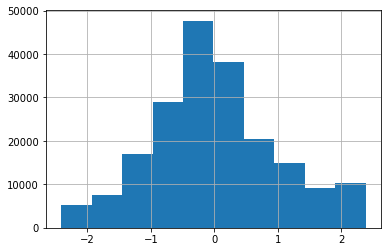

In [25]:
data['V10'].hist()

## 4. Chia dữ liệu

Cài đặt feature và label

In [26]:
feature_data = data.drop(['Class'], axis = 1)
label_data = data['Class']

In [27]:
feature_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.012182,-1.483668,-0.472418,0.576440,-1.280121,0.767097,-1.567969,1.081406,-1.259200,1.315021,...,-2.204493,-0.601974,1.293137,2.307521,0.709203,0.624006,-1.662941,1.948869,-1.276363,0.005405
1,0.889520,-0.243486,-2.452738,-2.502076,0.559670,0.097074,1.623571,1.785084,-0.216544,0.030686,...,2.134977,2.543073,-0.130175,-2.326602,-1.404264,-1.017248,1.398853,-1.829731,0.796518,1.000000
2,0.563006,-1.182510,-0.550107,1.632390,-0.710648,-1.125155,1.610210,-1.653086,1.724683,1.941674,...,-1.651229,-1.524495,-0.601047,-0.991005,0.014532,0.940931,1.792847,-0.452359,0.617581,0.405362
3,0.397171,0.701808,0.114694,0.082087,0.373142,-0.043935,-0.019102,-0.201668,0.180943,-0.051242,...,-0.382470,-0.693360,-1.046252,0.453604,-0.631527,0.248602,0.285290,-0.177852,0.006105,0.010702
4,0.069164,-0.651305,0.579632,0.779854,-1.158918,0.625608,0.606821,0.374555,0.418713,1.372712,...,0.473095,-0.813827,-0.664958,-0.449084,-2.339401,-0.487393,1.685579,1.948869,1.646550,0.201654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199359,0.437624,0.689988,0.045379,0.336873,0.374644,-0.273109,-0.120189,-0.203257,0.105542,-0.097055,...,-0.406175,-0.525446,-0.812144,0.620794,-0.012829,0.179599,0.240643,-0.201819,-0.057898,0.010702
199360,0.920181,-0.533636,0.083904,-0.855156,-0.924968,1.807096,2.232541,-0.551669,2.189814,0.408785,...,-0.840157,0.162731,-0.027859,0.922239,1.146436,-2.682117,-1.640401,0.323450,1.010905,0.482272
199361,0.461798,-0.138598,0.840410,1.091754,0.393098,0.327390,-0.722479,1.234961,-0.956826,-0.467527,...,0.111006,0.210761,0.500453,-1.075627,0.675349,0.475558,-0.844379,-0.807382,-1.665364,0.021295
199362,0.508884,-1.897348,2.054052,-1.861686,-2.447586,1.738222,2.232541,-0.558226,2.189814,0.585130,...,1.399304,-0.978048,-1.481233,0.553030,1.139788,0.642512,0.918270,1.948869,2.126553,0.005405


Chia dữ liệu train, val

In [28]:
x_train, x_test, y_train, y_test = train_test_split(feature_data, label_data, test_size =0.01 , random_state = 50)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((197370, 30), (1994, 30), (197370,), (1994,))

# II. Model

Xây dựng mô hình

In [29]:
model = Sequential([
    Input(shape=(30,)),
    Dense(2, activation='relu',kernel_regularizer='l2'),
    Dense(1, activation='sigmoid')
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 62        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


Lựa chọn thuật toán học

In [31]:
model.compile(optimizer='adam',
              loss= BinaryCrossentropy(),
              metrics=[AUC()])

Trainning
- epochs thứ 15 trở đi có vẻ đã đạt tối ưu toàn cục

In [32]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
6168/6168 [==============================] - 9s 1ms/step - loss: 0.0780 - auc: 0.8294 - val_loss: 0.0028 - val_auc: 1.0000
Epoch 2/10
6168/6168 [==============================] - 7s 1ms/step - loss: 0.0064 - auc: 0.9122 - val_loss: 0.0022 - val_auc: 1.0000
Epoch 3/10
6168/6168 [==============================] - 8s 1ms/step - loss: 0.0057 - auc: 0.9121 - val_loss: 0.0020 - val_auc: 1.0000
Epoch 4/10
6168/6168 [==============================] - 8s 1ms/step - loss: 0.0052 - auc: 0.9119 - val_loss: 0.0017 - val_auc: 1.0000
Epoch 5/10
6168/6168 [==============================] - 8s 1ms/step - loss: 0.0049 - auc: 0.9218 - val_loss: 0.0016 - val_auc: 1.0000
Epoch 6/10
6168/6168 [==============================] - 7s 1ms/step - loss: 0.0047 - auc: 0.9190 - val_loss: 0.0016 - val_auc: 1.0000
Epoch 7/10
6168/6168 [==============================] - 8s 1ms/step - loss: 0.0046 - auc: 0.9273 - val_loss: 0.0013 - val_auc: 1.0000
Epoch 8/10
6168/6168 [==============================] - 7s 1ms

# III.Evalue

In [33]:
y_pred = (model.predict(x_train) >= 0.5).astype(int)

target_names = ['0', '1']

from sklearn.metrics import classification_report
print(classification_report(
    y_train, y_pred, target_names=target_names
))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197015
           1       0.87      0.72      0.78       355

    accuracy                           1.00    197370
   macro avg       0.93      0.86      0.89    197370
weighted avg       1.00      1.00      1.00    197370



# IV. Deploy

In [34]:
data_submission

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,NaN
1,1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,NaN
2,2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,NaN
3,3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,NaN
4,4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85438,85438,124702.0,-0.673320,1.823100,-2.152665,-1.051308,1.822568,1.319646,-0.228012,-1.743339,...,2.292603,-0.929823,0.561185,2.970343,-0.632171,0.095316,0.031770,0.093565,3.99,NaN
85439,85439,159354.0,2.125553,-0.065046,-1.537467,0.125578,0.500319,-0.359530,0.124248,-0.201678,...,-0.342157,-0.878330,0.281129,0.035931,-0.173013,0.207555,-0.075438,-0.060078,1.79,NaN
85440,85440,31911.0,0.746800,-1.028053,1.127833,1.631418,-1.193487,0.946088,-0.857322,0.480905,...,0.073226,0.058198,-0.235697,-0.457910,0.328226,-0.219767,0.058352,0.058441,195.60,NaN
85441,85441,141043.0,2.080547,0.167780,-1.722107,0.403323,0.451991,-0.848388,0.190703,-0.239152,...,-0.367406,-0.945073,0.332659,0.484916,-0.246959,0.174693,-0.061887,-0.030910,0.89,NaN


In [35]:
data_submission = data_submission.drop(['Class'], axis = 1)
data_submission = drop_feature(data_submission)
data_submission[col_mm] = minmax(data_submission)
data_submission[normalized_ss] = standard(data_submission)

In [36]:
answer = (model.predict(data_submission) >= 0.5).astype(int)
answer

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

Ghi dữ liệu

In [37]:
submission_label_path = './data/sample_submission.csv'
df_submission_label = pd.read_csv(submission_label_path)
df_submission_label['Class'] = answer
df_submission_label

,ID,Class
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
85438,85438,0
85439,85439,0
85440,85440,0
85441,85441,0


Lưu

In [38]:
df_submission_label.to_csv(submission_label_path, index = False)